# Tomtom output exploration
I did some of this in a R notebook as well.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from kipoi_veff.utils.plot import seqlogo_heatmap
import seaborn as sns
import csv
import pandas as pd
import re

/home/ubuntu/anaconda3/envs/kipoi-shared__envs__kipoi-py3-keras2/lib/python3.6/site-packages/kipoi_veff/external/concise/seqplotting_deps.py:34: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/home/ubuntu/anaconda3/envs/kipoi-shared__envs__kipoi-py3-keras2/lib/python3.6/site-packages/kipoi_veff/external/concise/seqplotting_deps.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


In [2]:
result_dir = '../out/'
tomtom_dir = "../tomtom_scripts/results/"
jaspar_dir = '../data/JASPAR-2020/'

# get jaspar PWM function
def getJasparPwm(index):
    jaspar_list = []
    with open(jaspar_dir + jaspar_id[index] + '.meme', "r") as f:
        for line in f:
            if re.match('^ [0-9].*', line):
                jaspar_list.append(line.replace('\n', ''))

    jaspar = np.zeros((len(jaspar_list), 4))
    for i in range(len(jaspar_list)):
        for j in range(4):
            jaspar[i, j] = float(jaspar_list[i].split()[j])
    return jaspar
def pwmRevComp(pwm):
    return np.fliplr(np.flipud(pwm))

def swapPositions(pwms):
    x = pwms[:, 1:2, :].clone()
    y = pwms[:, 2:3, :].clone()
    pwms[:, 1:2, :] = y
    pwms[:, 2:3, :] = x
    return pwms
def swapPositionsNP(pwms):
    x = pwms[:, 1:2, :].copy()
    y = pwms[:, 2:3, :].copy()
    pwms[:, 1:2, :] = y
    pwms[:, 2:3, :] = x
    return pwms

def transformDirect(pwms):
    pwms_tmp = np.zeros((pwms.shape[0], pwms.shape[1], pwms.shape[2]))
    for i in range(pwms.shape[0]):
        for j in range(pwms.shape[2]):
            col = pwms[i, :, j].numpy()
            pwms_tmp[i, :, j] = np.abs(
                col - col.min()) / np.abs((col - col.min())).sum()
    return pwms_tmp

## All active 

In [21]:
pwms = swapPositions(torch.load(result_dir + "PWMs_all_active_per_seq.pt"))
tomtom = pd.read_csv(tomtom_dir + "PWMs_all_active_per_seq.tsv", sep='\t')
tomtom.head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation
0,1,MA1622.1,6,0.000465,0.346825,0.314703,8,GGCAGCCG,TTATGAGTCATCAT,-
1,1,MA1149.1,3,0.000553,0.412646,0.314703,8,GGCAGCCG,GAGGTCATGTAGAGGTCA,+
2,1,MA0140.2,7,0.000633,0.472226,0.314703,8,GGCAGCCG,CTTATCTGTGAGGAGCAG,+
3,1,MA1126.1,6,0.000877,0.654142,0.326952,8,GGCAGCCG,GATGACGTCATCATTT,+
4,3,MA0258.2,7,0.000313,0.233792,0.467583,8,TTTGTCCC,AGGTCACCCTGACCT,+


In [22]:
# sort the tomtom data by p-value and look at the top couple motifs 
pwm_id = tomtom.sort_values(by=['p-value'])['Query_ID'].to_list()
jaspar_id = tomtom.sort_values(by=['p-value'])['Target_ID'].to_list()
offset = tomtom.sort_values(by=['p-value'])['Optimal_offset'].to_list()
orientation = tomtom.sort_values(by=['p-value'])['Orientation'].to_list()
tomtom.sort_values(by=['p-value']).head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation
474,234,MA1142.1,0,1.484510e-09,0.000001,0.000002,8,ATGAGTCA,ATGAGTCATC,-
591,266,MA1142.1,2,1.550750e-09,0.000001,0.000002,8,TGAGTCAT,GATGACTCAT,+
657,304,MA1137.1,3,2.438580e-09,0.000002,0.000002,8,TGACTCAT,TGATGACTCATAC,+
658,304,MA1142.1,2,2.537690e-09,0.000002,0.000002,8,TGACTCAT,GATGACTCAT,+
475,234,MA1137.1,2,8.630060e-09,0.000006,0.000006,8,ATGAGTCA,GTATGAGTCATCA,-


<AxesSubplot:>

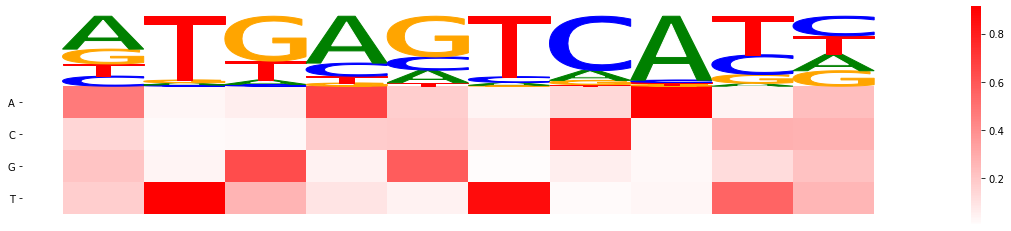

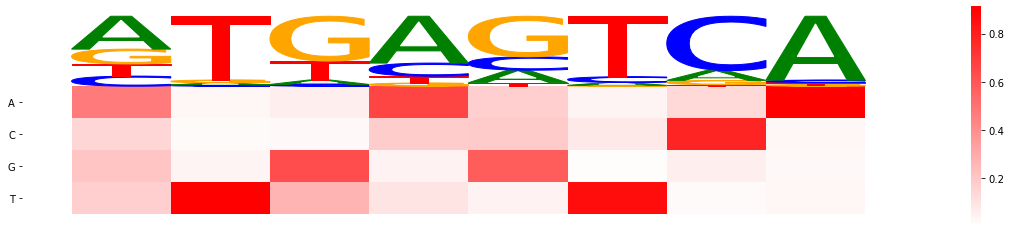

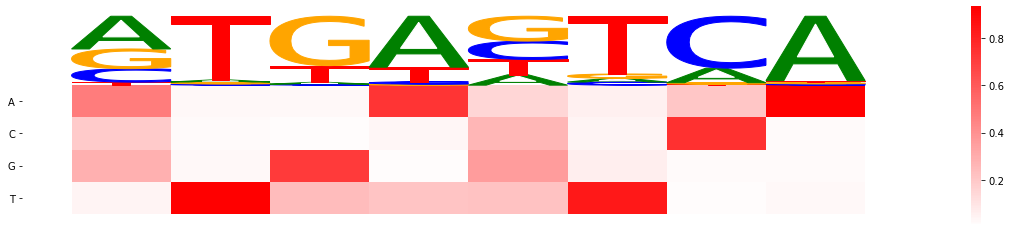

In [23]:
index = 0
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[pwm_id[index] - 1, :, :].numpy().T, 
                pwms[pwm_id[index] - 1, :, :].numpy())

<AxesSubplot:>

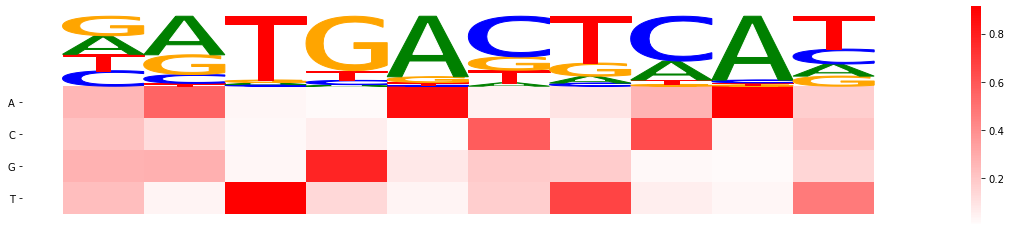

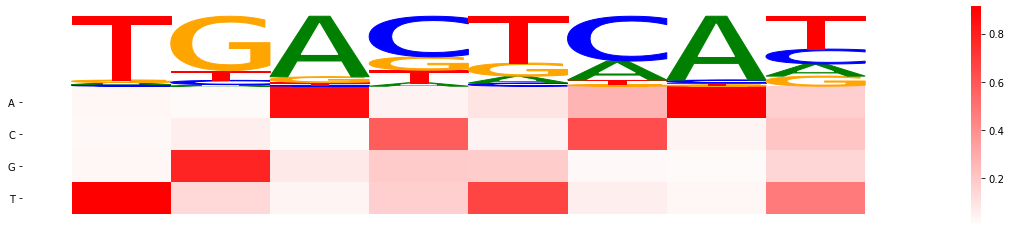

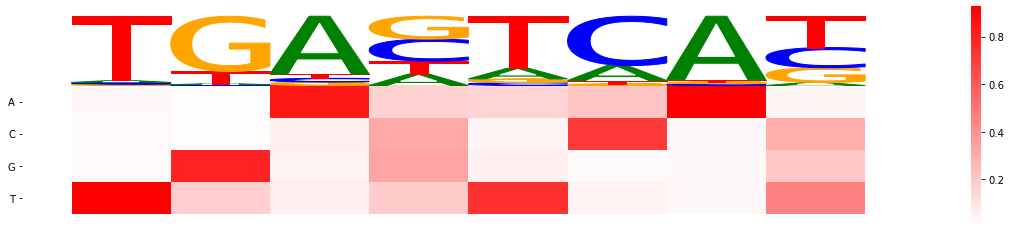

In [24]:
index = 1
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[pwm_id[index] - 1, :, :].numpy().T, 
                pwms[pwm_id[index] - 1, :, :].numpy())

<AxesSubplot:>

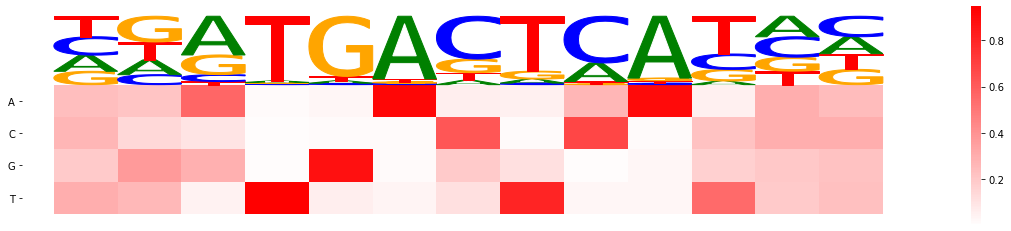

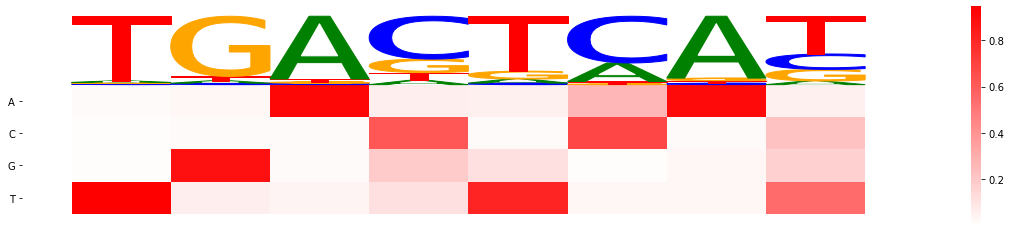

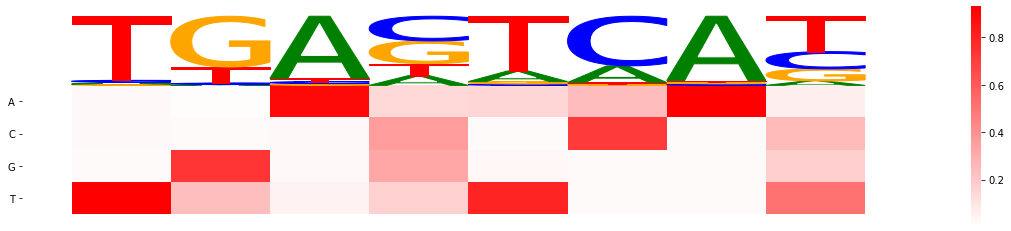

In [25]:
index = 2
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[pwm_id[index] - 1, :, :].numpy().T, 
                pwms[pwm_id[index] - 1, :, :].numpy())

<AxesSubplot:>

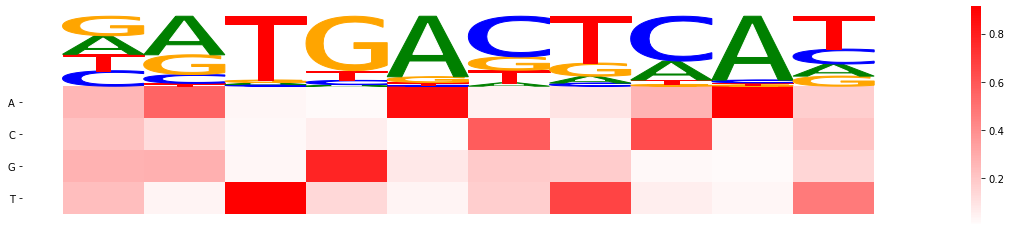

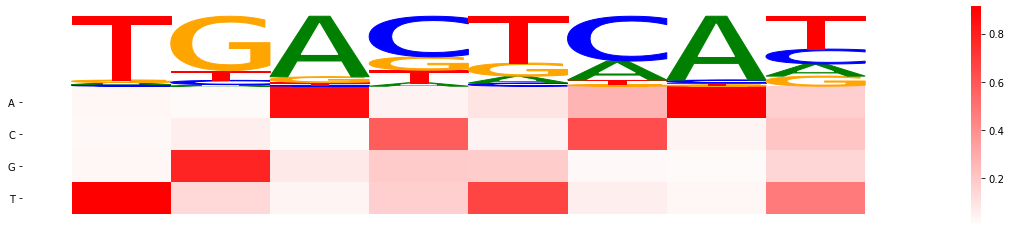

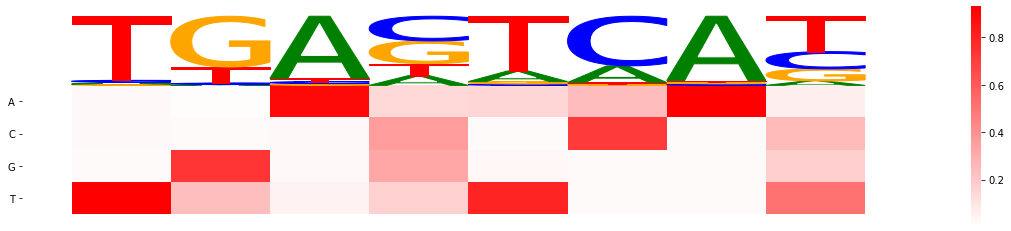

In [26]:
index = 3
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[pwm_id[index] - 1, :, :].numpy().T, 
                pwms[pwm_id[index] - 1, :, :].numpy())

## Max active

In [27]:
pwms = swapPositions(torch.load(result_dir + "PWMs_max_active_per_seq.pt"))
tomtom = pd.read_csv(tomtom_dir + "PWMs_max_active_per_seq.tsv", sep='\t')

# sort the tomtom data by p-value and look at the top couple motifs 
pwm_id = tomtom.sort_values(by=['p-value'])['Query_ID'].to_list()
jaspar_id = tomtom.sort_values(by=['p-value'])['Target_ID'].to_list()
offset = tomtom.sort_values(by=['p-value'])['Optimal_offset'].to_list()
orientation = tomtom.sort_values(by=['p-value'])['Orientation'].to_list()
tomtom.sort_values(by=['p-value']).head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation
3526,234,MA1137.1,2,2.473980e-08,0.000018,0.000035,8,ATGAGTCA,GTATGAGTCATCA,-
1635,108,MA1138.1,0,3.473780e-08,0.000026,0.000045,8,GATGAGTC,GATGACTCAT,+
4151,266,MA1137.1,3,4.351720e-08,0.000032,0.000062,8,TGACTCAT,TGATGACTCATAC,+
361,25,MA0098.3,2,4.610690e-08,0.000034,0.000068,8,AGGAAGTG,ACCGGAAGTG,+
1636,108,MA1135.1,0,6.280070e-08,0.000047,0.000045,8,GATGAGTC,GATGACTCAT,+


<AxesSubplot:>

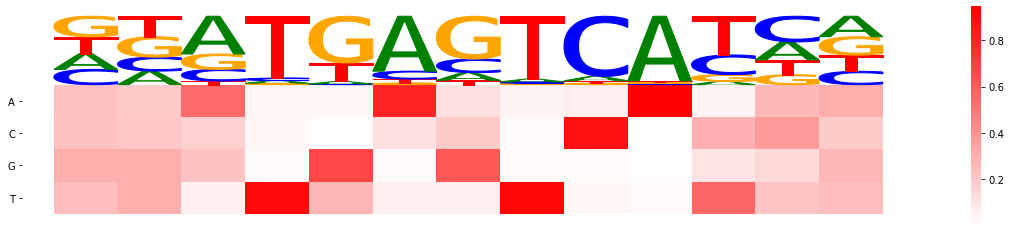

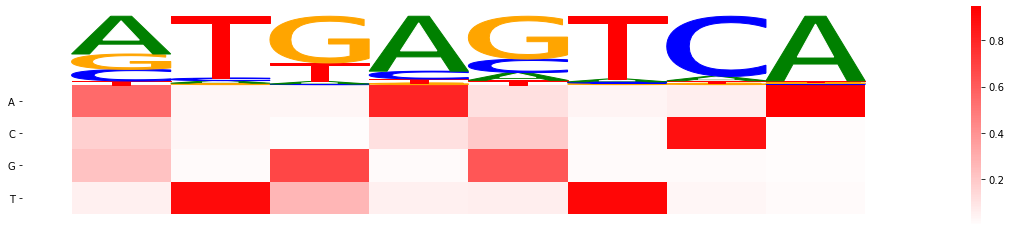

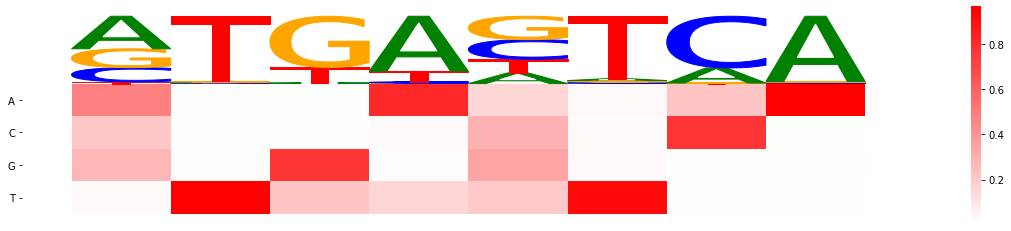

In [29]:
index = 0
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[pwm_id[index] - 1, :, :].numpy().T, 
                pwms[pwm_id[index] - 1, :, :].numpy())

In [48]:
print(jaspar[0:2, 0:])
print(jaspar_rev[0:2, 0:])

[[0.007712 0.025707 0.005141 0.96144 ]
 [0.904884 0.       0.005141 0.089974]]
[[0.96144  0.005141 0.025707 0.007712]
 [0.089974 0.005141 0.       0.904884]]


<AxesSubplot:>

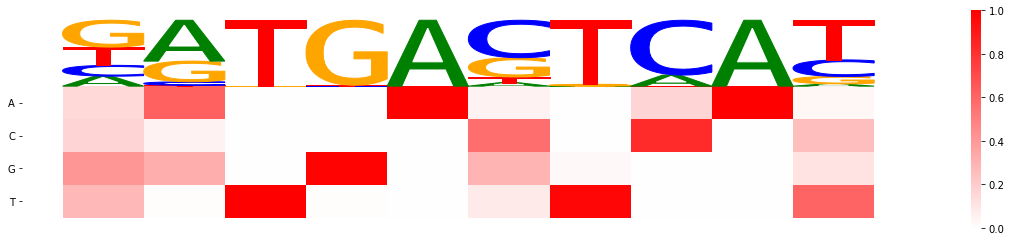

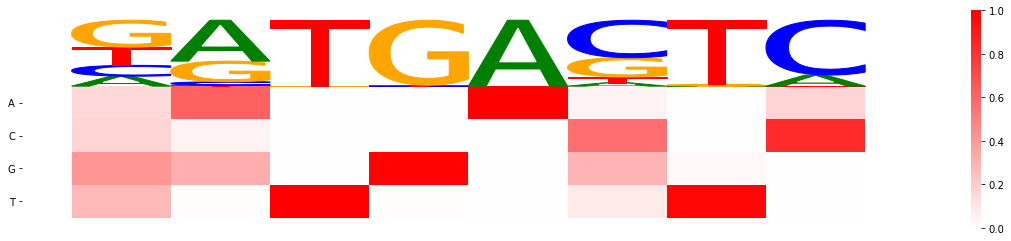

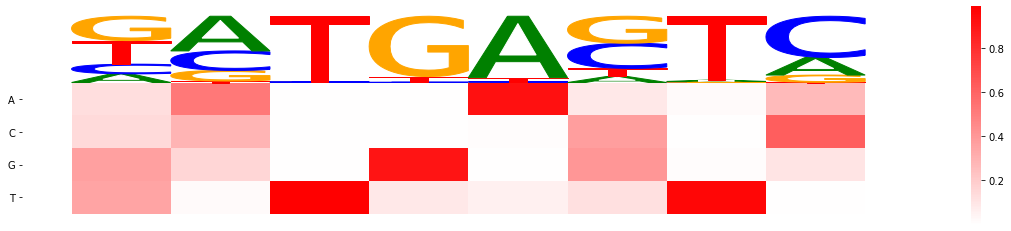

In [30]:
index = 1
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[pwm_id[index] - 1, :, :].numpy().T, 
                pwms[pwm_id[index] - 1, :, :].numpy())

<AxesSubplot:>

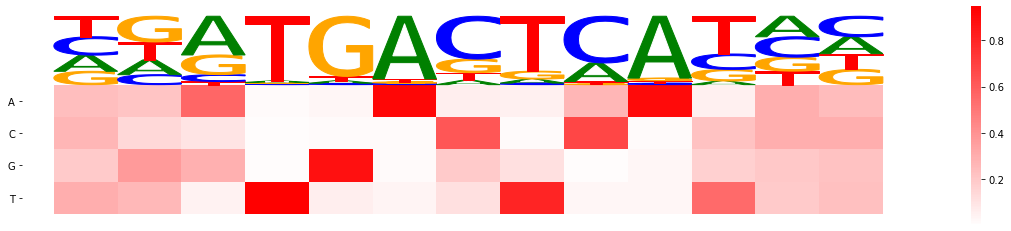

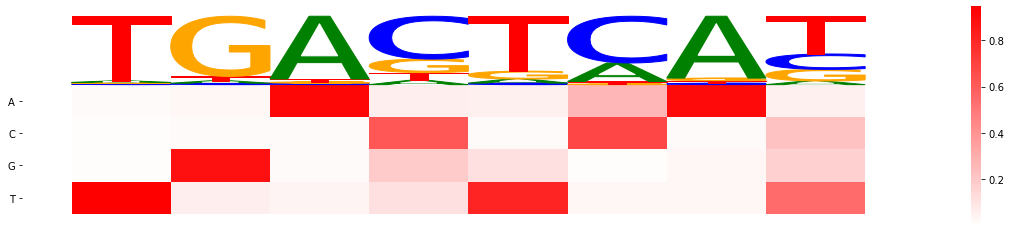

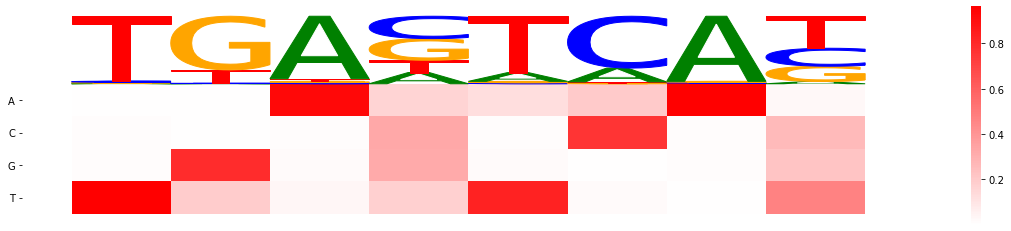

In [31]:
index = 2
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[pwm_id[index] - 1, :, :].numpy().T, 
                pwms[pwm_id[index] - 1, :, :].numpy())

<AxesSubplot:>

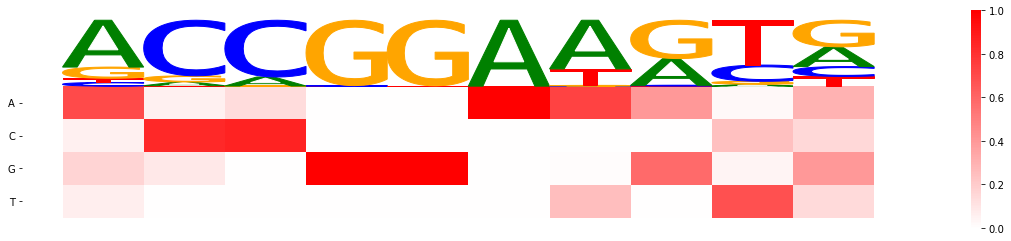

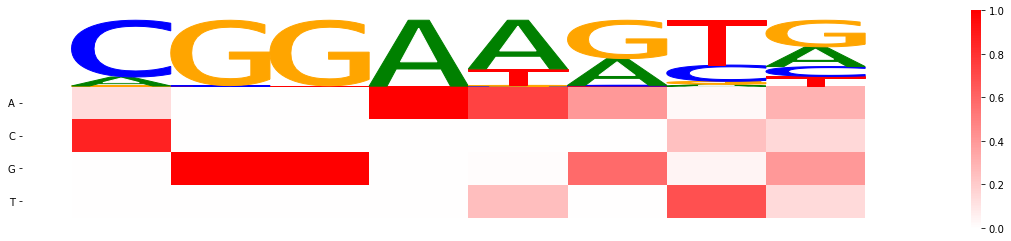

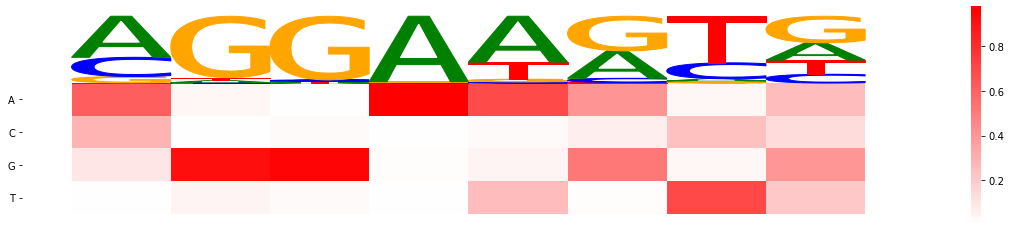

In [32]:
index = 3
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[pwm_id[index] - 1, :, :].numpy().T, 
                pwms[pwm_id[index] - 1, :, :].numpy())

## Direct PWMs

In [29]:
pwms_orig = torch.load(result_dir + "PWMs_direct.pt")
pwms = transformDirect(pwms_orig)
tomtom = pd.read_csv(tomtom_dir + "PWMs_direct.tsv", sep='\t')

# sort the tomtom data by p-value and look at the top couple motifs 
pwm_id = tomtom.sort_values(by=['p-value'])['Query_ID'].to_list()
jaspar_id = tomtom.sort_values(by=['p-value'])['Target_ID'].to_list()
offset = tomtom.sort_values(by=['p-value'])['Optimal_offset'].to_list()
orientation = tomtom.sort_values(by=['p-value'])['Orientation'].to_list()
tomtom.sort_values(by=['p-value']).head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation
989,248,MA0523.1,6,1.116150e-08,0.000008,0.000017,8,TGATGTGC,TTCCTTTGATCTTT,-
265,60,MA0146.2,0,3.836390e-07,0.000286,0.000416,8,CCCGCCCG,GGGGCCGAGGCCTG,+
803,195,MA0108.2,4,2.042630e-06,0.001524,0.003048,8,AAAAGGCC,GTATAAAAGGCGGGG,+
866,205,MA0108.2,6,2.108310e-06,0.001573,0.003146,8,AAAGCAAG,GTATAAAAGGCGGGG,+
1142,306,MA0108.2,1,2.779800e-06,0.002074,0.004147,8,CCTGGTTA,CCCCGCCTTTTATAC,-


<AxesSubplot:>

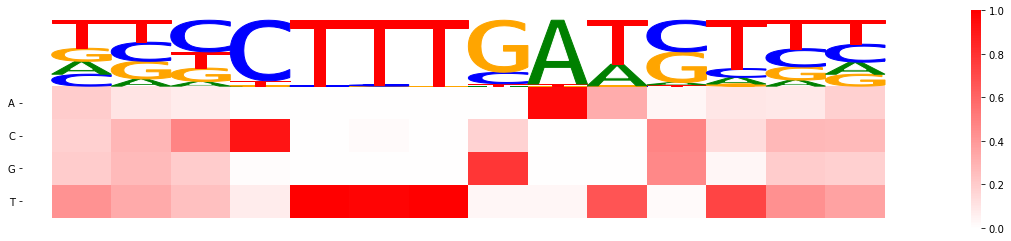

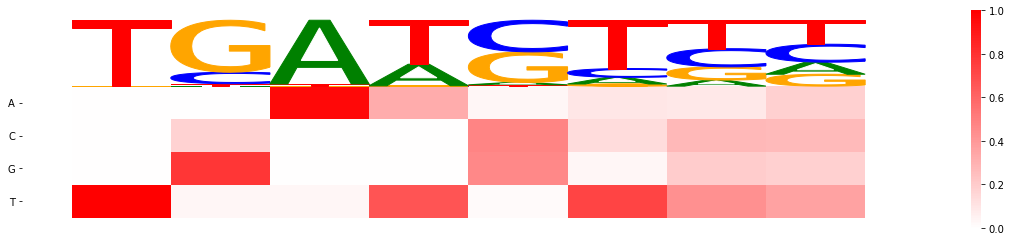

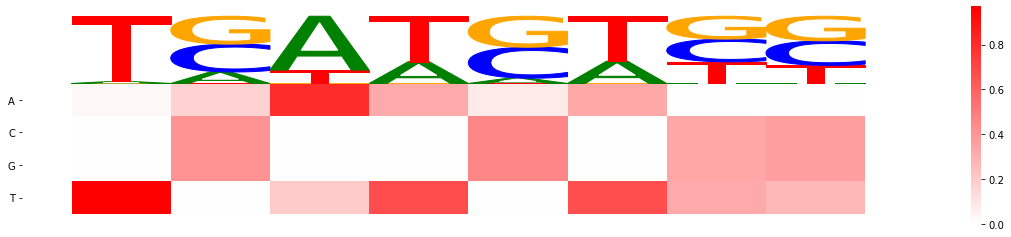

In [30]:
index = 0
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[pwm_id[index] - 1, :, :].T, 
                pwms[pwm_id[index] - 1, :, :])

<AxesSubplot:>

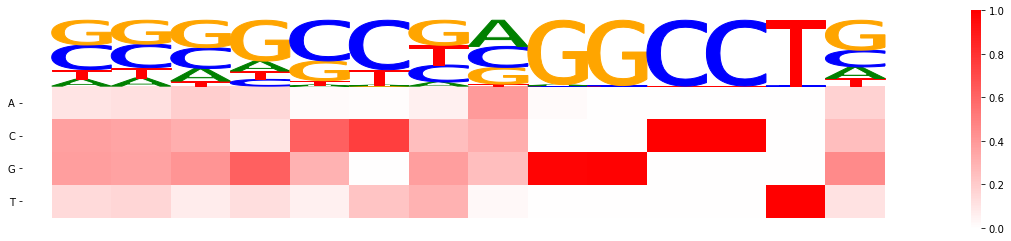

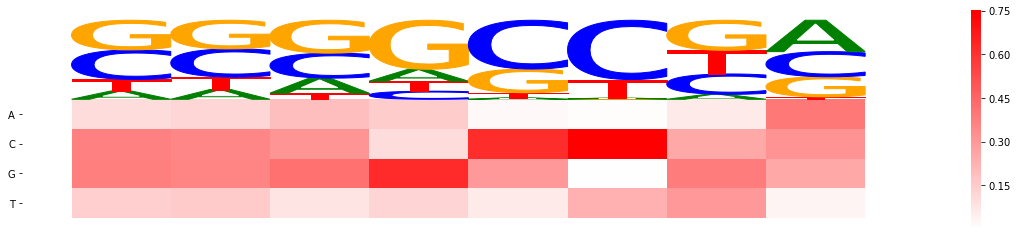

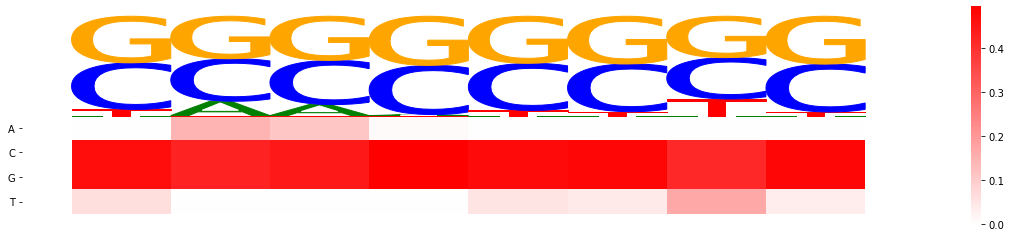

In [31]:
index = 1

jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[pwm_id[index] - 1, :, :].T, 
                pwms[pwm_id[index] - 1, :, :])

## Y observed output
### CTCF results

In [ ]:
# load learned PWMs
pwms = torch.load(result_dir + "PWMs_max_active_per_seq_yobserved_1.pt")
ctcf_filters = [47, 79, 124, 194]
feature_index = [339, 792, 805, 814]
jaspar_id = ["MA0139.1"]

# load tomtom results for the best matches 
tomtom_dir2 = tomtom_dir + "PWMs_max_active_per_seq_yobserved_1/"
tomtom = []
for index in feature_index:
    file = tomtom_dir2 + "pwms_" + str(index) + ".txt.tsv"
    tomtom.append(pd.read_csv(file, sep='\t'))
    
# get offsets 
offsets = []
for i in range(len(ctcf_filters)):
    df = tomtom[i]
    offsets.append(
        df[(
            df['Target_ID'] == jaspar_id[0]) & (
            df['Query_ID'] == ctcf_filters[i])][
            'Optimal_offset'].values)

<AxesSubplot:>

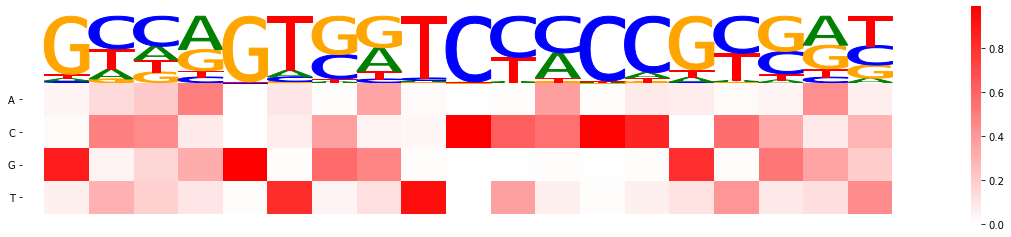

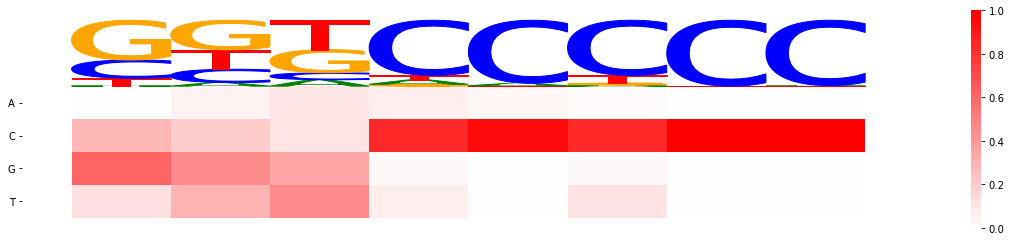

In [134]:
filter_num = 0
index = 0
jaspar = getJasparPwm(index)
jaspar = pwmRevComp(jaspar)

seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(pwms[feature_index[filter_num], 
                     ctcf_filters[filter_num] - 1, :, :].numpy().T, 
                pwms[feature_index[filter_num], 
                     ctcf_filters[filter_num] - 1, :, :].numpy())


<AxesSubplot:>

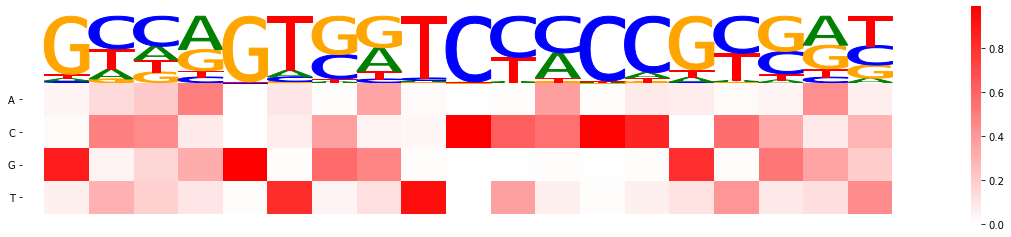

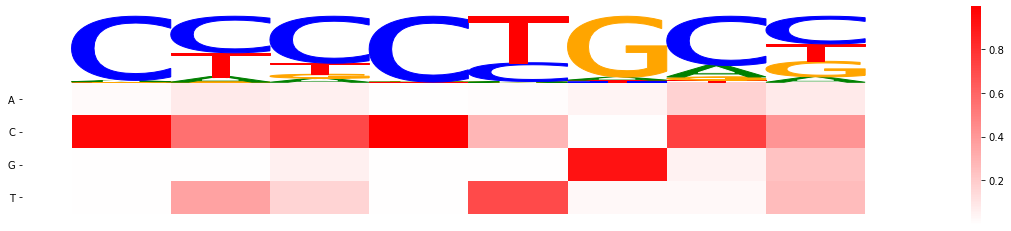

In [135]:
filter_num = 1
index = 0

jaspar = getJasparPwm(index)
jaspar = pwmRevComp(jaspar)

seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(pwms[feature_index[filter_num], 
                     ctcf_filters[filter_num] - 1, :, :].numpy().T, 
                pwms[feature_index[filter_num], 
                     ctcf_filters[filter_num] - 1, :, :].numpy())

<AxesSubplot:>

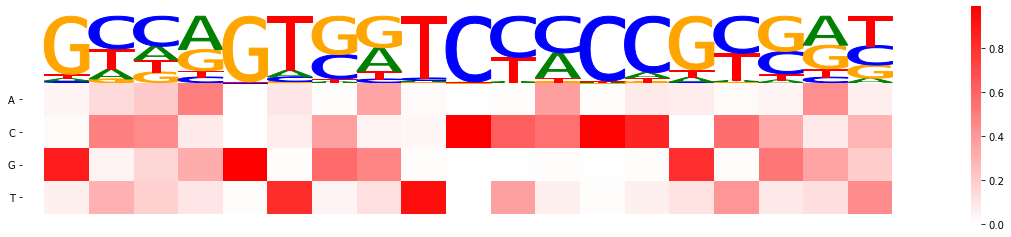

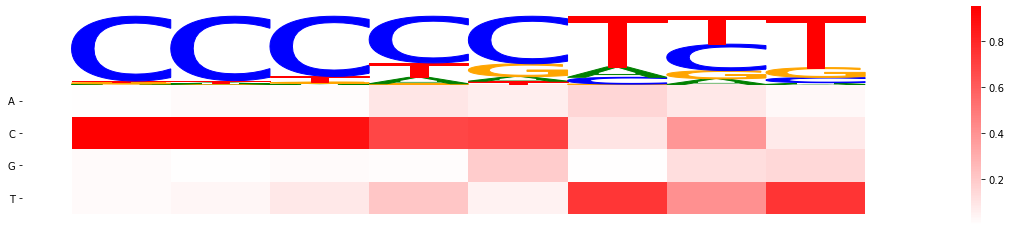

In [136]:
filter_num = 2
index = 0

jaspar = getJasparPwm(index)
jaspar = pwmRevComp(jaspar)

seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(pwms[feature_index[filter_num], 
                     ctcf_filters[filter_num] - 1, :, :].numpy().T, 
                pwms[feature_index[filter_num], 
                     ctcf_filters[filter_num] - 1, :, :].numpy())

<AxesSubplot:>

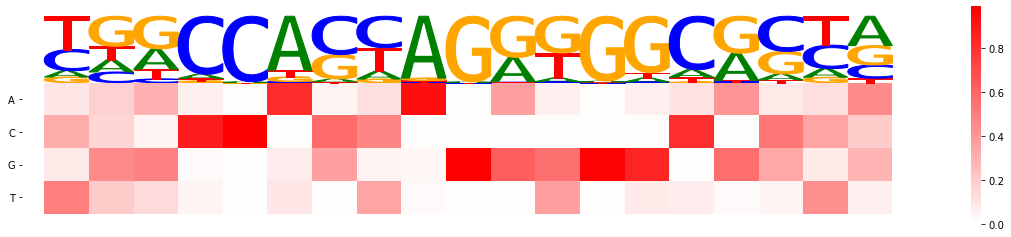

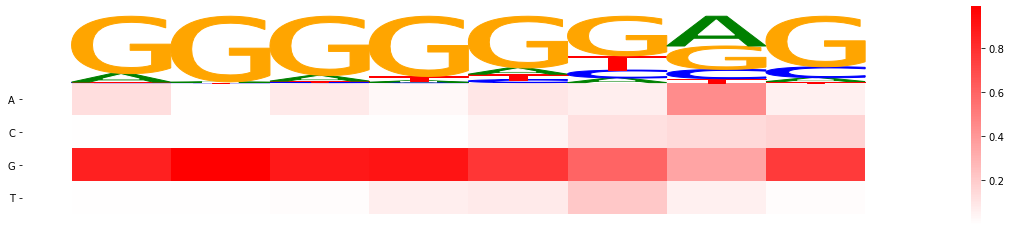

In [138]:
filter_num = 3
index = 0

jaspar = getJasparPwm(index)

seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(pwms[feature_index[filter_num], 
                     ctcf_filters[filter_num] - 1, :, :].numpy().T, 
                pwms[feature_index[filter_num], 
                     ctcf_filters[filter_num] - 1, :, :].numpy())

#### Looking at data other types for these same filters

In [16]:
pwms_all = swapPositions(torch.load(result_dir + "PWMs_all_active_per_seq.pt"))
pwms_max = swapPositions(torch.load(result_dir + "PWMs_max_active_per_seq.pt"))
pwms_direct = torch.load(result_dir + "PWMs_direct.pt")
pwms_trans = transformDirect(pwms_direct)
filters = [47, 79, 124, 276]
jaspar_id = ["MA1102.2", "MA0139.1"]

<AxesSubplot:>

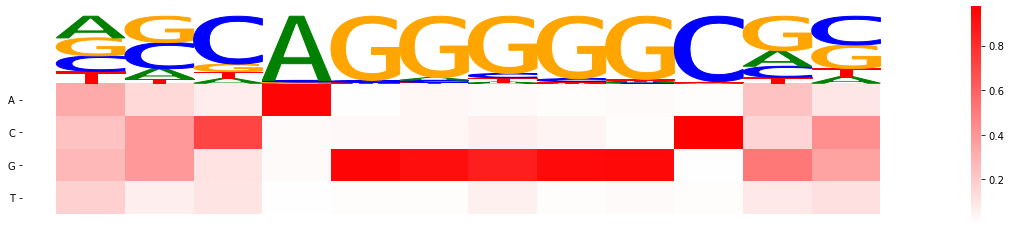

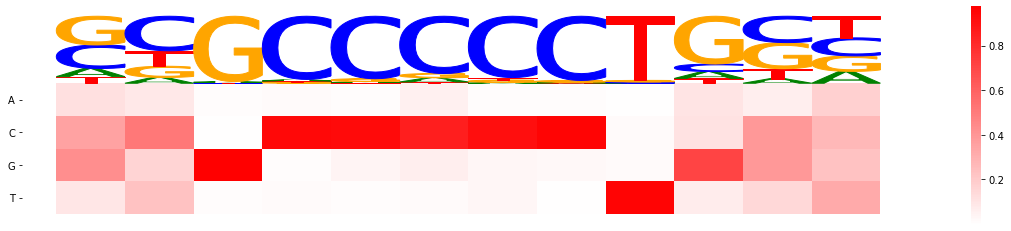

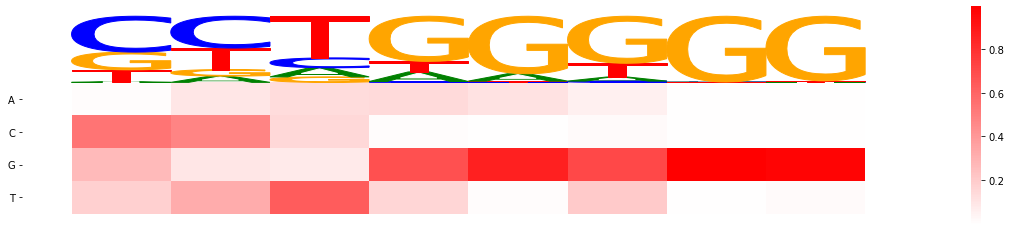

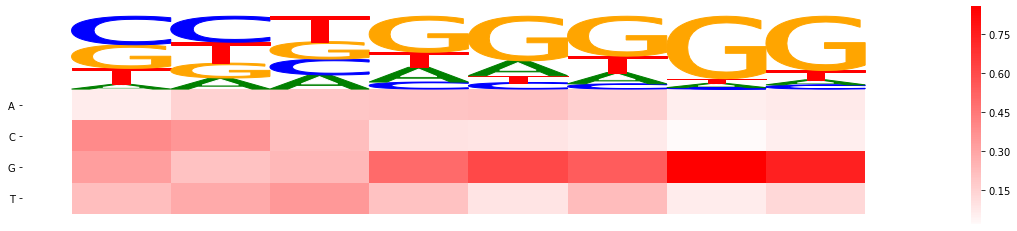

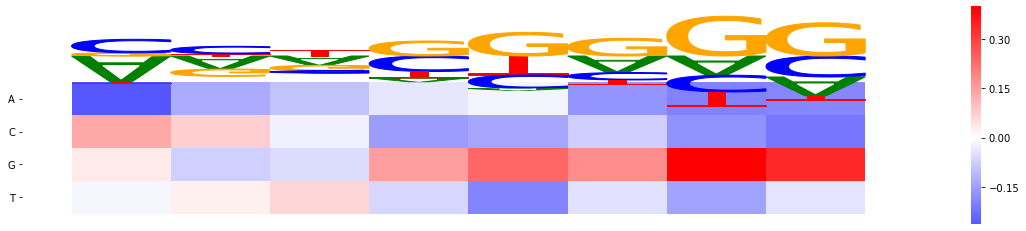

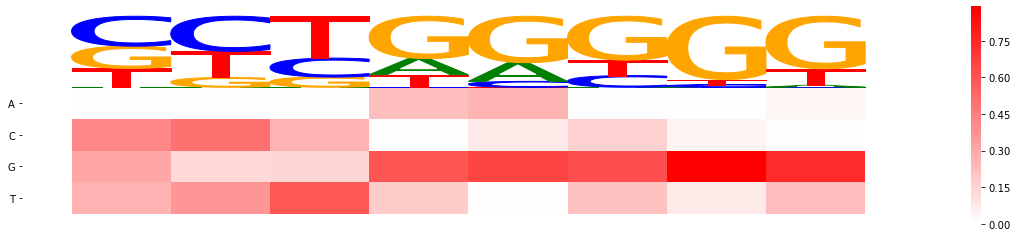

In [17]:
feature_num = 0
filter_num = 0
jaspar = getJasparPwm(feature_num)
jaspar_rev = pwmRevComp(jaspar)
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar_rev, jaspar_rev.T)
seqlogo_heatmap(pwms_max[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_max[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_all[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_all[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_direct[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_direct[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_trans[filters[filter_num] - 1, :, :].T, 
                pwms_trans[filters[filter_num] - 1, :, :])

<AxesSubplot:>

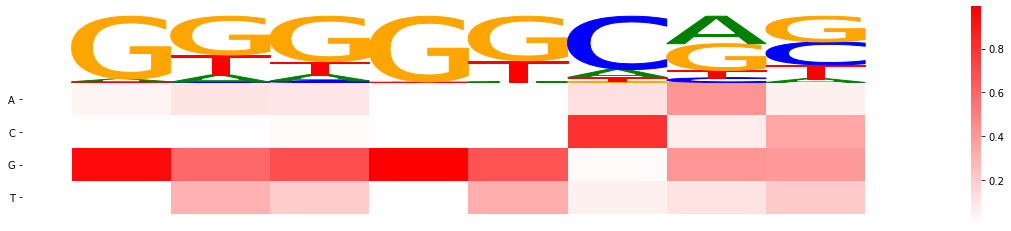

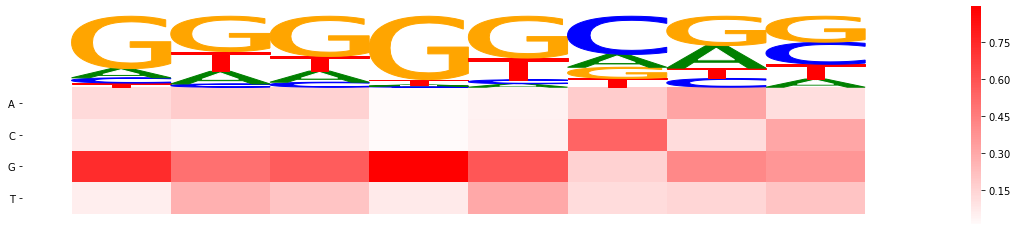

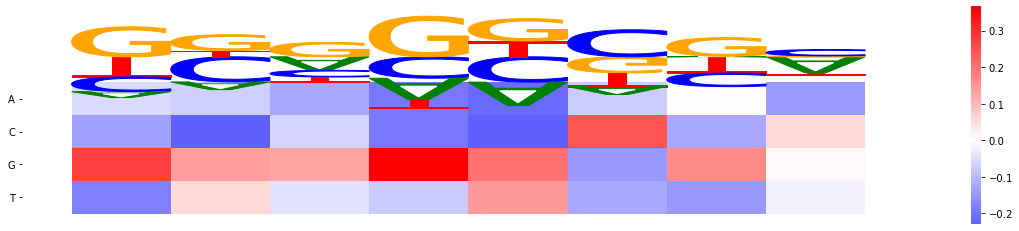

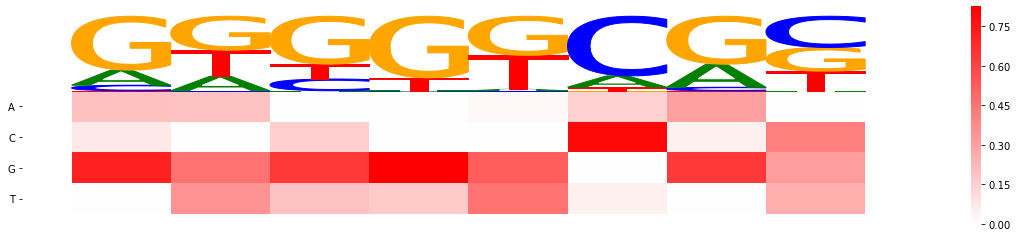

In [18]:
feature_num = 0
filter_num = 1
jaspar = getJasparPwm(feature_num)
jaspar_rev = pwmRevComp(jaspar)
seqlogo_heatmap(pwms_max[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_max[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_all[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_all[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_direct[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_direct[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_trans[filters[filter_num] - 1, :, :].T, 
                pwms_trans[filters[filter_num] - 1, :, :])

<AxesSubplot:>

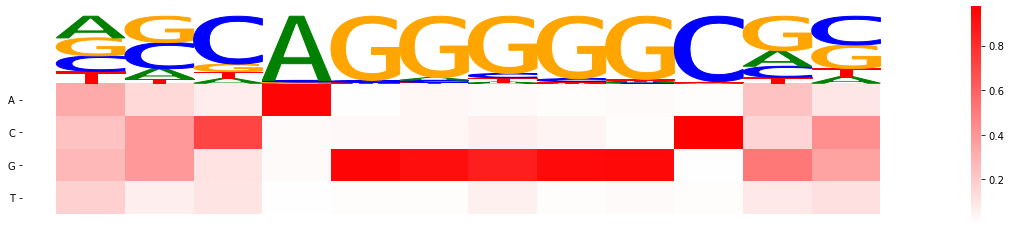

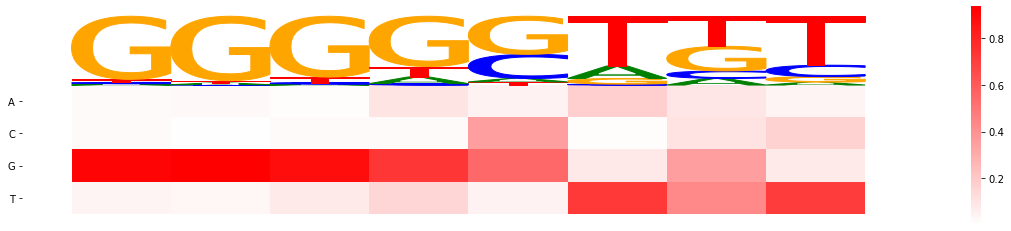

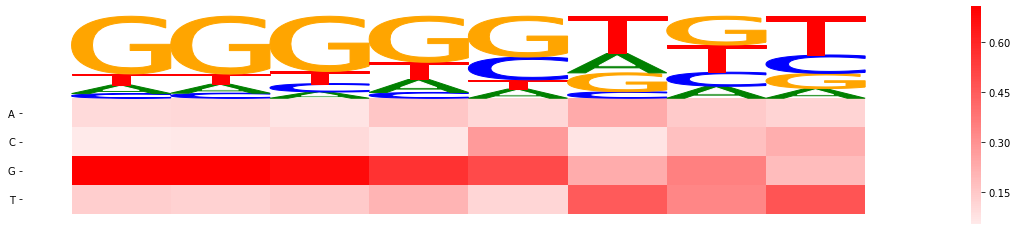

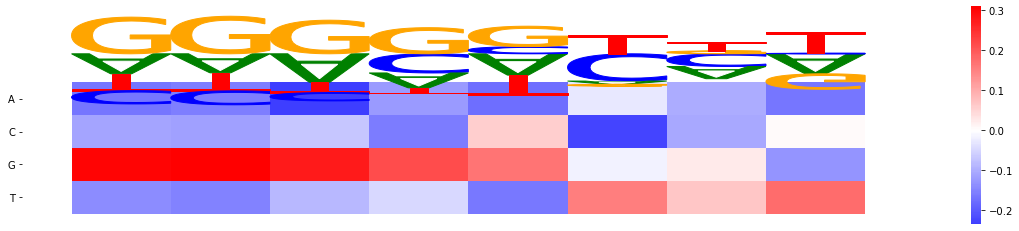

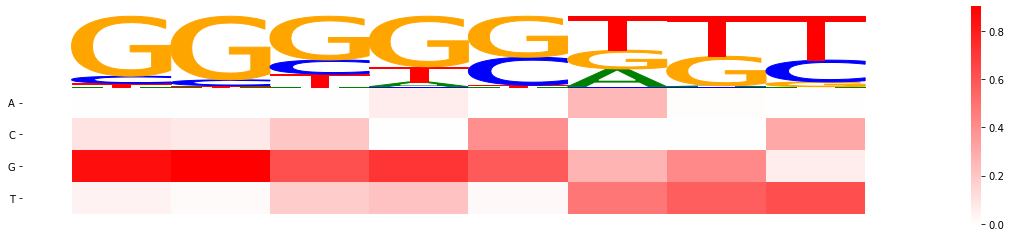

In [20]:
feature_num = 0
filter_num = 2
jaspar = getJasparPwm(feature_num)
jaspar_rev = pwmRevComp(jaspar)
# seqlogo_heatmap(jaspar_rev[3:11, :], jaspar_rev[3:11, :].T)
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(pwms_max[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_max[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_all[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_all[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_direct[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_direct[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_trans[filters[filter_num] - 1, :, :].T, 
                pwms_trans[filters[filter_num] - 1, :, :])

<AxesSubplot:>

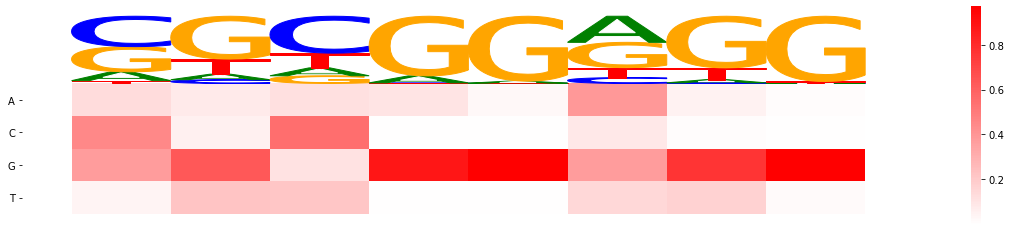

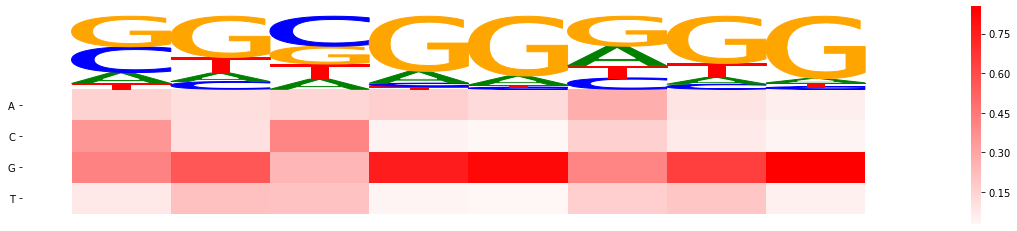

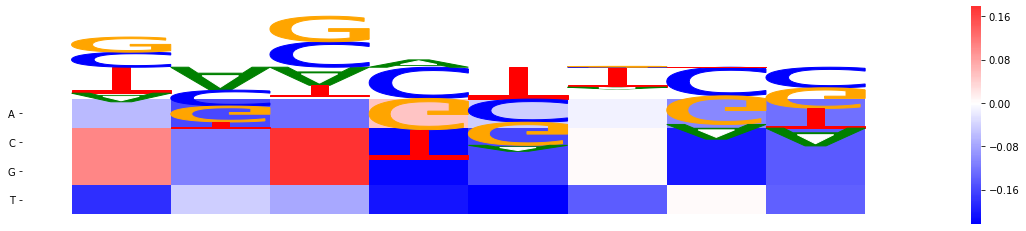

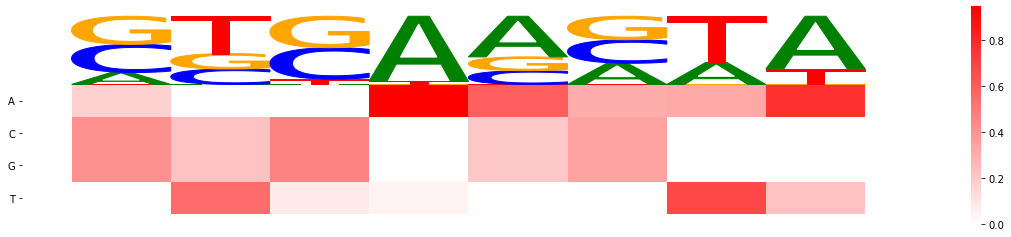

In [43]:
feature_num = 0
filter_num = 3
jaspar = getJasparPwm(feature_num)
jaspar_rev = pwmRevComp(jaspar)
seqlogo_heatmap(pwms_max[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_max[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_all[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_all[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_direct[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_direct[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_trans[filters[filter_num] - 1, :, :].T, 
                pwms_trans[filters[filter_num] - 1, :, :])

<AxesSubplot:>

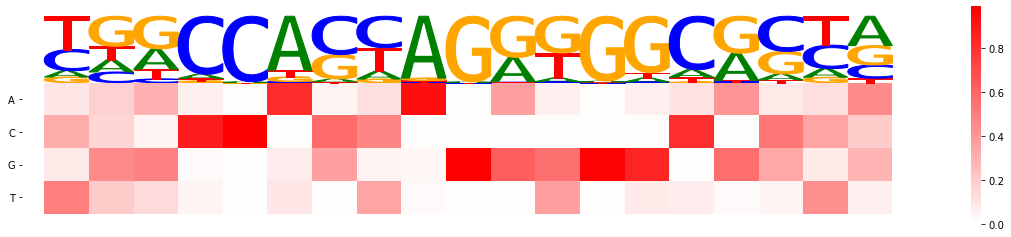

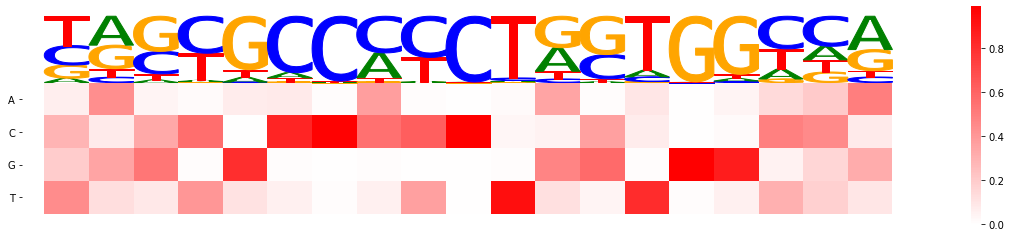

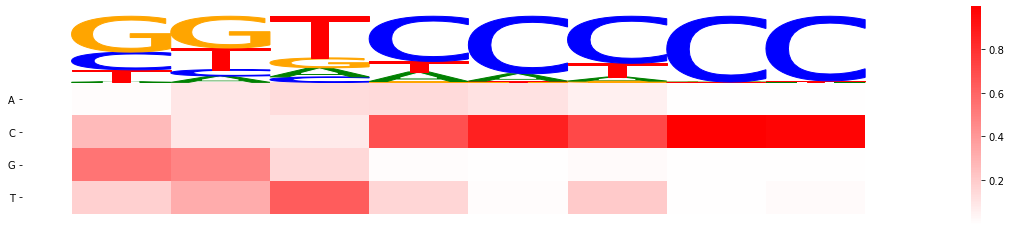

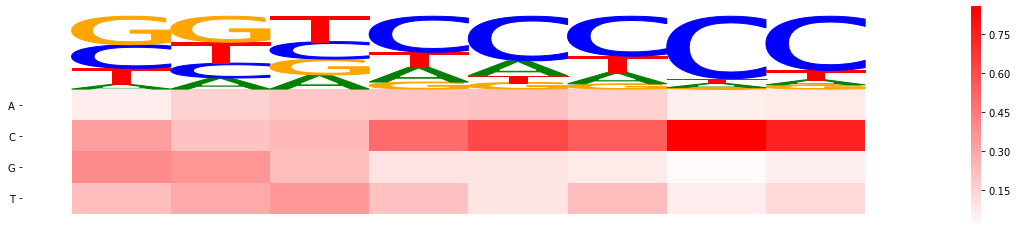

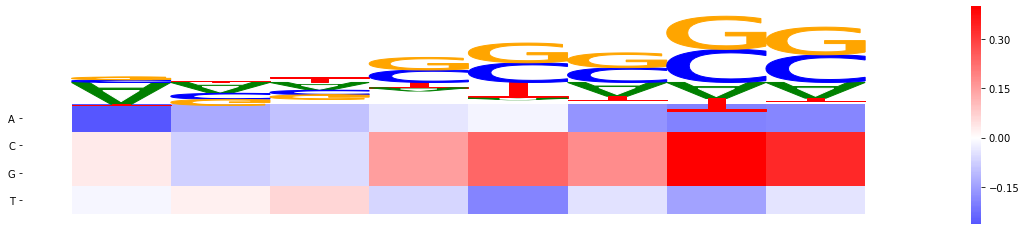

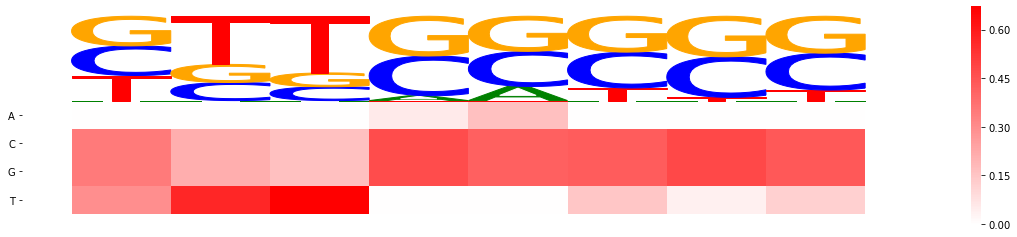

In [44]:
feature_num = 1
filter_num = 0
jaspar = getJasparPwm(feature_num)
jaspar_rev = pwmRevComp(jaspar)
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar_rev, jaspar_rev.T)
seqlogo_heatmap(pwms_max[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_max[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_all[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_all[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_direct[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_direct[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_trans[filters[filter_num] - 1, :, :].T, 
                pwms_trans[filters[filter_num] - 1, :, :])

<AxesSubplot:>

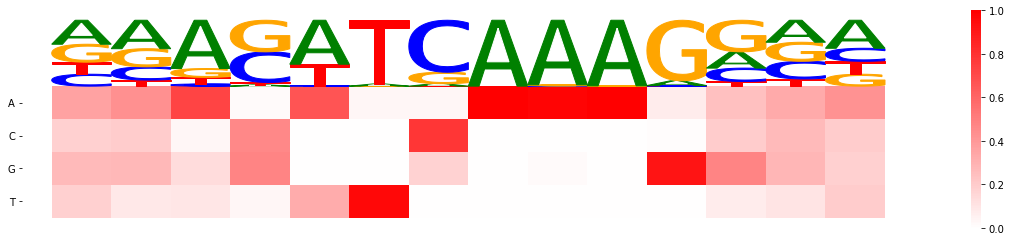

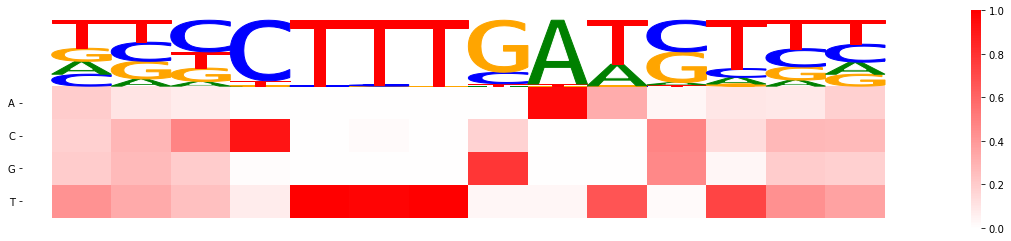

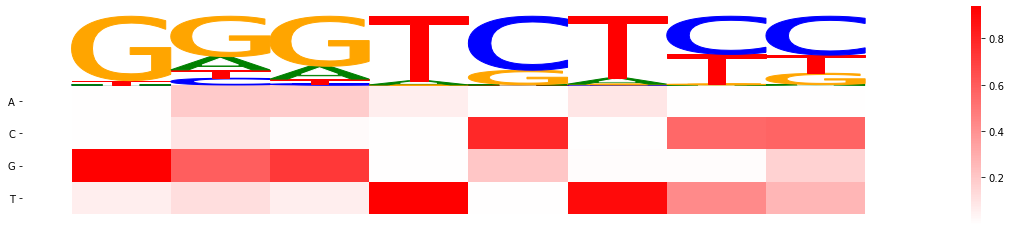

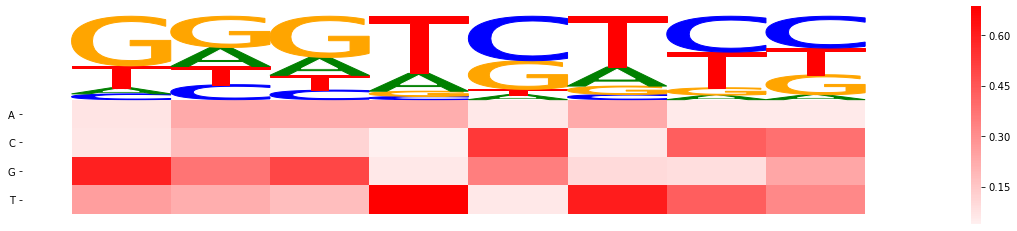

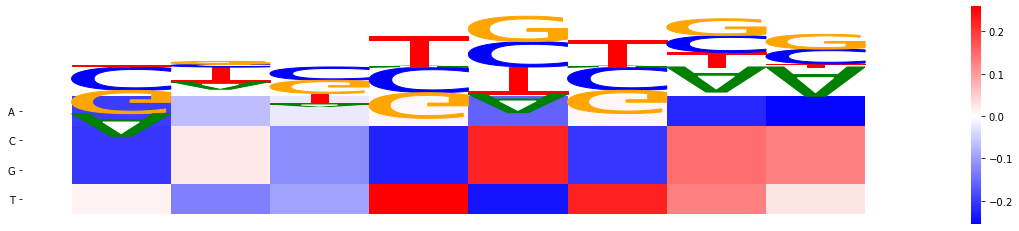

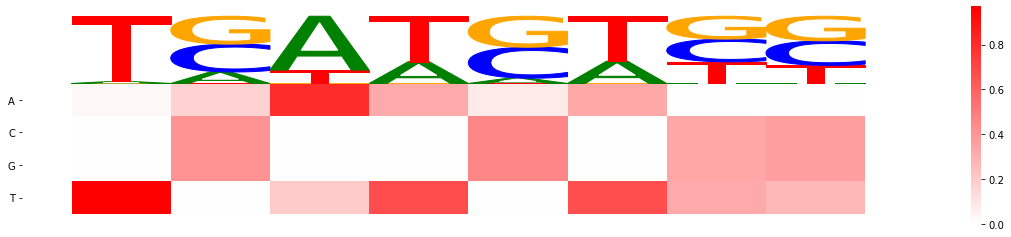

In [10]:
filters = [248]
jaspar_id = ["MA0523.1"]
feature_num = 0
filter_num = 0
jaspar = getJasparPwm(feature_num)
jaspar_rev = pwmRevComp(jaspar)
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar_rev, jaspar_rev.T)
seqlogo_heatmap(pwms_max[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_max[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_all[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_all[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_direct[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_direct[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_trans[filters[filter_num] - 1, :, :].T, 
                pwms_trans[filters[filter_num] - 1, :, :])

In [12]:
pwms_max.shape

torch.Size([320, 4, 8])

<AxesSubplot:>

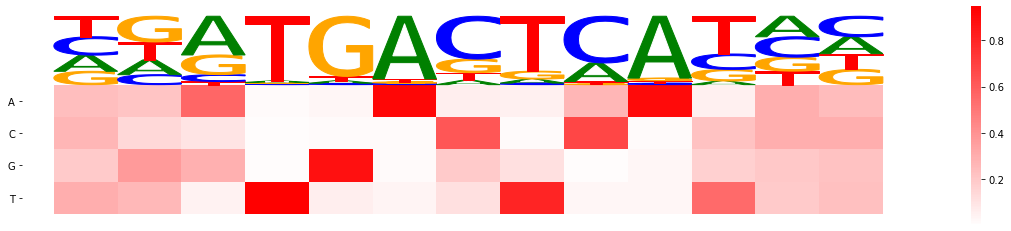

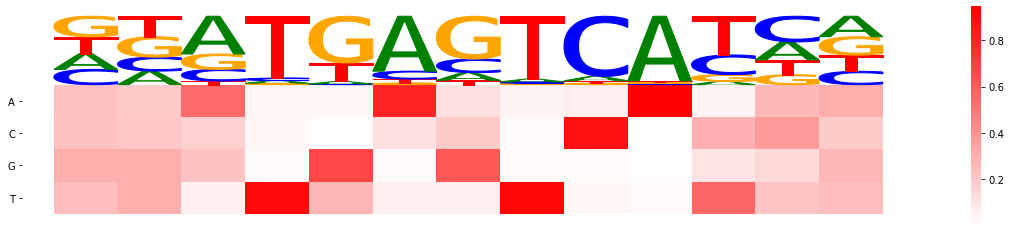

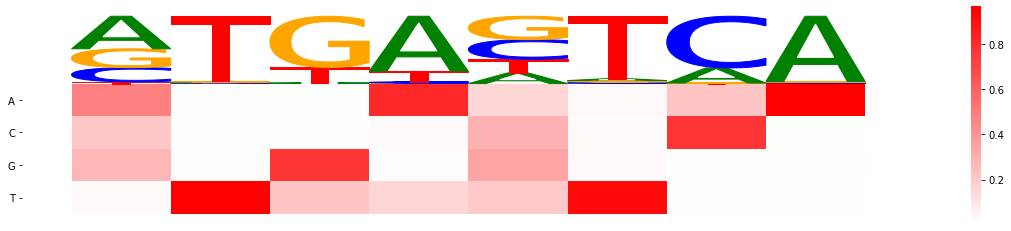

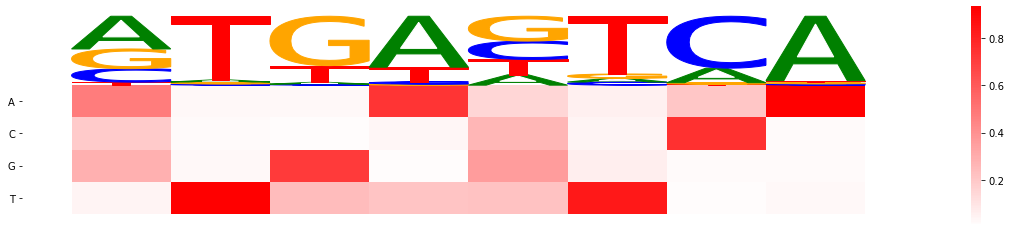

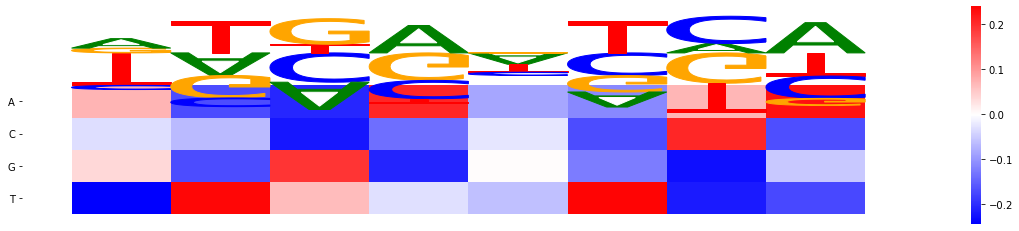

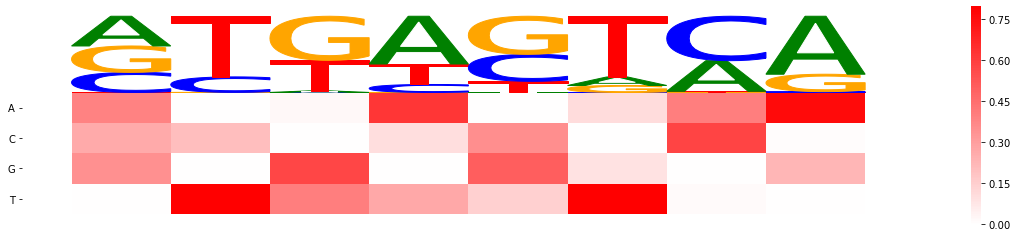

In [33]:
filters = [234]
jaspar_id = ["MA1137.1"]
feature_num = 0
filter_num = 0
jaspar = getJasparPwm(feature_num)
jaspar_rev = pwmRevComp(jaspar)
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar_rev, jaspar_rev.T)
seqlogo_heatmap(pwms_max[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_max[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_all[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_all[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_direct[filters[filter_num] - 1, :, :].numpy().T, 
                pwms_direct[filters[filter_num] - 1, :, :].numpy())
seqlogo_heatmap(pwms_trans[filters[filter_num] - 1, :, :].T, 
                pwms_trans[filters[filter_num] - 1, :, :])

## Looking at the single filter 

In [9]:
pwms = swapPositionsNP(torch.load(result_dir + "PWMs_filter3.pt"))
tomtom = pd.read_csv(tomtom_dir + "PWMs_filter3.tsv", sep='\t')

# sort the tomtom data by p-value and look at the top couple motifs 
pwm_id = tomtom.sort_values(by=['p-value'])['Query_ID'].to_list()
jaspar_id = tomtom.sort_values(by=['p-value'])['Target_ID'].to_list()
offset = tomtom.sort_values(by=['p-value'])['Optimal_offset'].to_list()
orientation = tomtom.sort_values(by=['p-value'])['Orientation'].to_list()
tomtom.sort_values(by=['p-value']).head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation
746,2,MA0258.2,7,0.000313,0.233792,0.467583,8,TTTGTCCC,AGGTCACCCTGACCT,+
0,1,MA0727.1,8,0.000517,0.385964,0.618251,8,TTTGTCCC,GGGAACATTGTGTTCCC,-
1492,3,MA0258.2,7,0.001018,0.759769,0.913141,8,TTTGTTCC,AGGTCACCCTGACCT,+
1493,3,MA0140.2,3,0.001224,0.913141,0.913141,8,TTTGTTCC,CTGCTCCTCACAGATAAG,-
1,1,MA0065.2,5,0.001419,1.058850,0.618251,8,TTTGTCCC,TGACCTTTGCCCTAC,-


<AxesSubplot:>

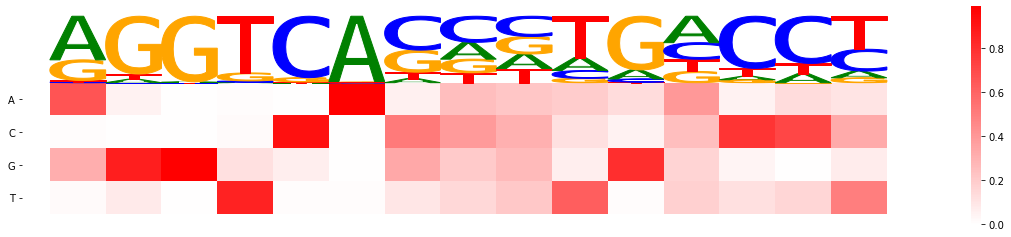

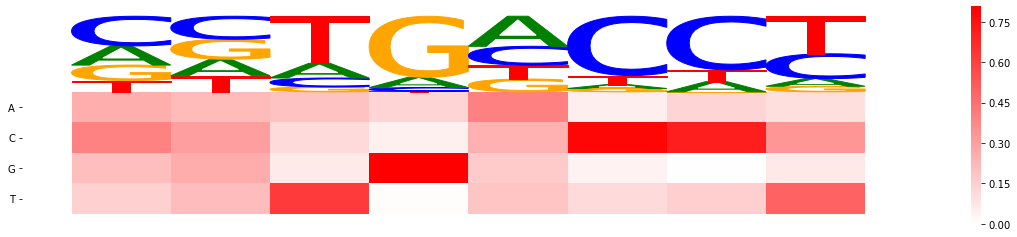

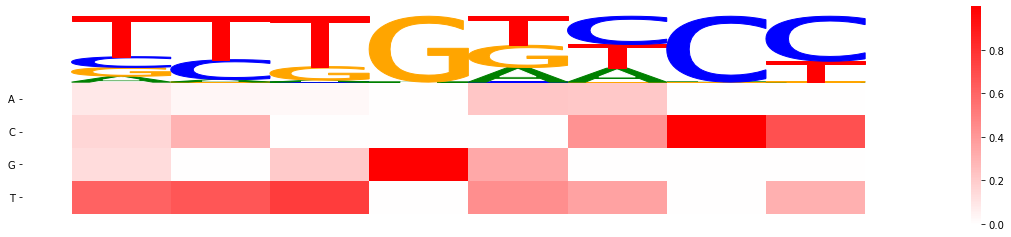

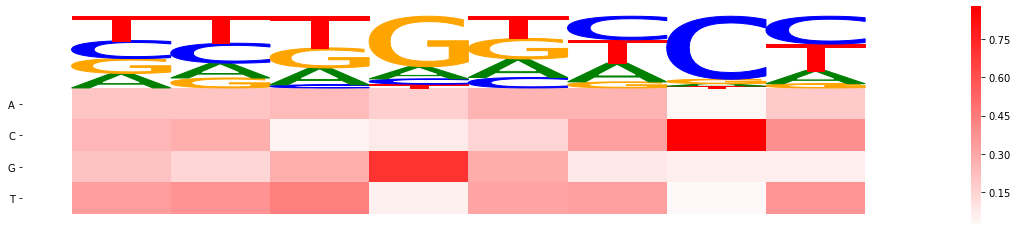

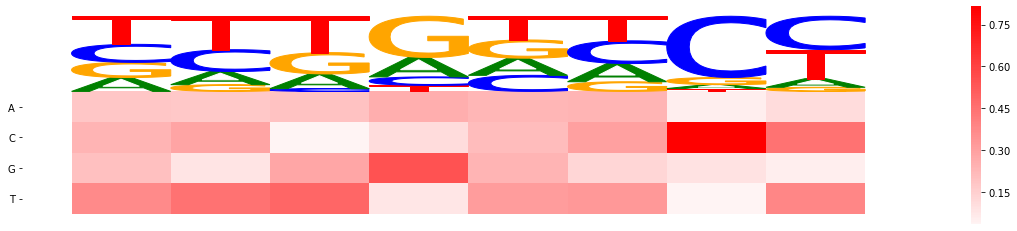

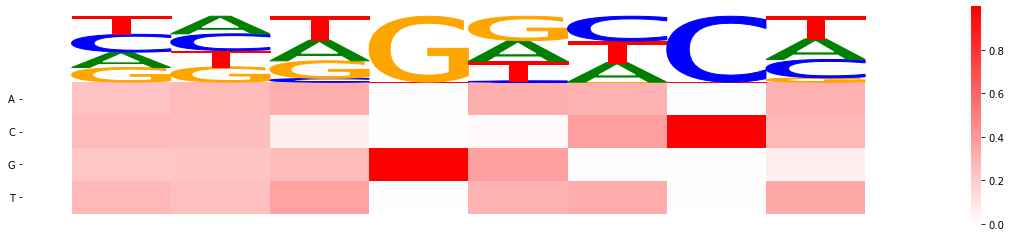

In [10]:
index = 0
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[0, :, :].T, 
                pwms[0, :, :])
seqlogo_heatmap(pwms[1, :, :].T, 
                pwms[1, :, :])
seqlogo_heatmap(pwms[2, :, :].T, 
                pwms[2, :, :])
seqlogo_heatmap(pwms[3, :, :].T, 
                pwms[3, :, :])

In [18]:
pwms_all = swapPositions(torch.load(result_dir + "PWMs_all_active_per_seq.pt"))
pwms_max = swapPositions(torch.load(result_dir + "PWMs_max_active_per_seq.pt"))
pwms_direct = torch.load(result_dir + "PWMs_direct.pt")
pwms_trans = transformDirect(pwms_direct)
pwms = np.array(
    (pwms_all[233, :, :].numpy(), 
     pwms_max[233, :, :].numpy(),
     pwms_trans[233, :, :]
    )
)

In [19]:
tomtom = pd.read_csv(tomtom_dir + "PWMs_filter3.tsv", sep='\t')

# sort the tomtom data by p-value and look at the top couple motifs 
pwm_id = tomtom.sort_values(by=['p-value'])['Query_ID'].to_list()
jaspar_id = tomtom.sort_values(by=['p-value'])['Target_ID'].to_list()
offset = tomtom.sort_values(by=['p-value'])['Optimal_offset'].to_list()
orientation = tomtom.sort_values(by=['p-value'])['Orientation'].to_list()
tomtom.sort_values(by=['p-value']).head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation
746,2,MA0258.2,7,0.000313,0.233792,0.467583,8,TTTGTCCC,AGGTCACCCTGACCT,+
0,1,MA0727.1,8,0.000517,0.385964,0.618251,8,TTTGTCCC,GGGAACATTGTGTTCCC,-
1492,3,MA0258.2,7,0.001018,0.759769,0.913141,8,TTTGTTCC,AGGTCACCCTGACCT,+
1493,3,MA0140.2,3,0.001224,0.913141,0.913141,8,TTTGTTCC,CTGCTCCTCACAGATAAG,-
1,1,MA0065.2,5,0.001419,1.058850,0.618251,8,TTTGTCCC,TGACCTTTGCCCTAC,-


<AxesSubplot:>

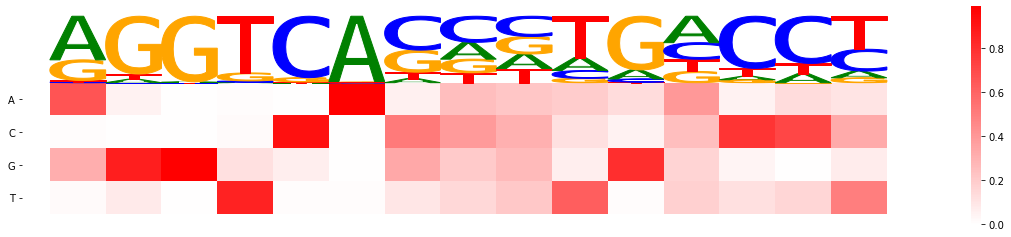

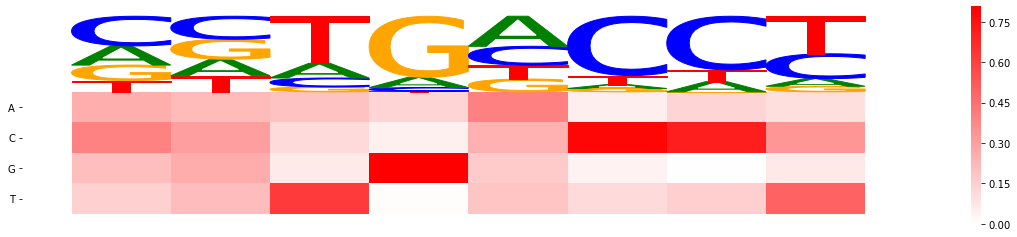

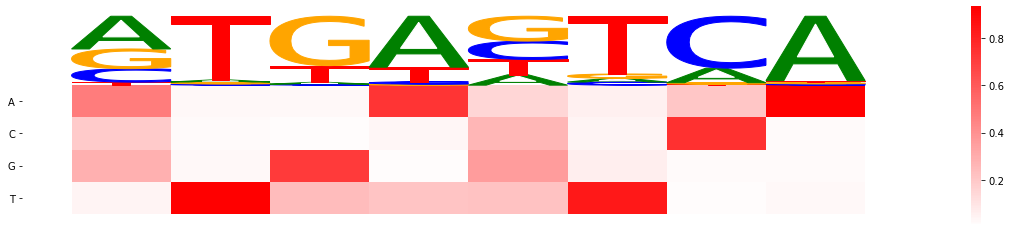

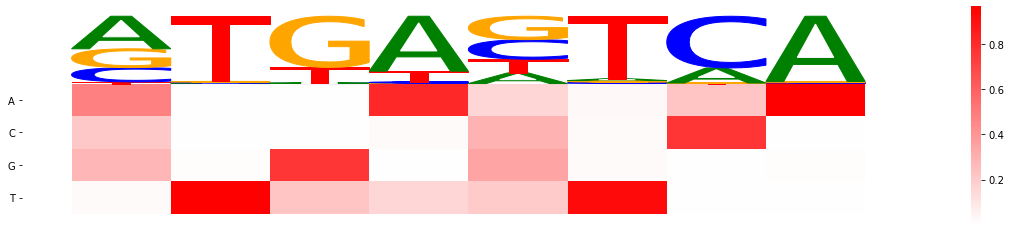

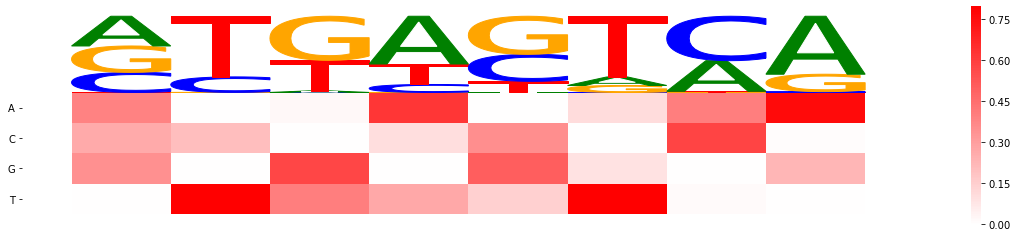

In [20]:
index = 0
jaspar = getJasparPwm(index)
if orientation[index] == '-':
    jaspar = pwmRevComp(jaspar)
if offset[index] < 0:
    offset[index] = 0
seqlogo_heatmap(jaspar, jaspar.T)
seqlogo_heatmap(jaspar[offset[index]:(offset[index] + 8), :], 
                jaspar[offset[index]:(offset[index] + 8), :].T)
seqlogo_heatmap(pwms[0, :, :].T, 
                pwms[0, :, :])
seqlogo_heatmap(pwms[1, :, :].T, 
                pwms[1, :, :])
seqlogo_heatmap(pwms[2, :, :].T, 
                pwms[2, :, :])

# TF modisco

In [42]:
tomtom = pd.read_csv(tomtom_dir + "PWMs_modisco.tsv", sep='\t')

# sort the tomtom data by p-value and look at the top couple motifs 
pwm_id = tomtom.sort_values(by=['p-value'])['Query_ID'].to_list()
jaspar_id = tomtom.sort_values(by=['p-value'])['Target_ID'].to_list()
offset = tomtom.sort_values(by=['p-value'])['Optimal_offset'].to_list()
orientation = tomtom.sort_values(by=['p-value'])['Orientation'].to_list()
tomtom.sort_values(by=['p-value']).head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation
14174,20,MA0139.1,3,2.778400e-17,2.072680e-14,4.117080e-14,13,CCACCAGGGGGCG,TGGCCACCAGGGGGCGCTA,+
31332,43,MA0139.1,3,1.369980e-13,1.022000e-10,2.025060e-10,13,CCACCAGGGGGCG,TGGCCACCAGGGGGCGCTA,+
5222,8,MA0139.1,3,8.032260e-12,5.992060e-09,1.193130e-08,12,CCACCAGGGGGC,TGGCCACCAGGGGGCGCTA,+
12682,18,MA0598.3,2,2.707370e-10,2.019700e-07,3.975350e-07,9,CACTTCCTG,CTCACTTCCTGTTTC,+
30586,42,MA1633.1,4,3.344290e-10,2.494840e-07,4.803000e-07,8,TGAGTCAT,TTGCTGAGTCATC,-


In [6]:
import pickle
file = open("../out/modisco_pwm/modisco_pwm.pkl",'rb')
pwms = pickle.load(file)
file.close()

<AxesSubplot:>

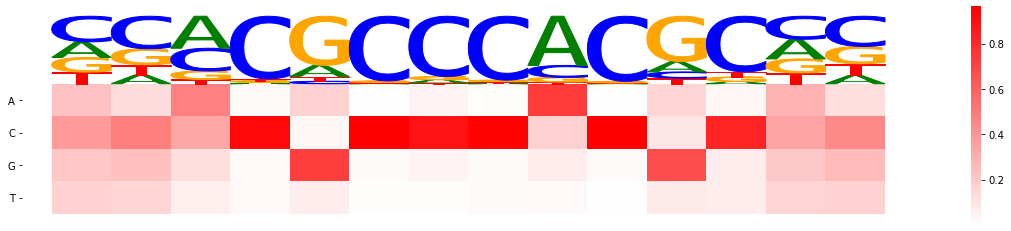

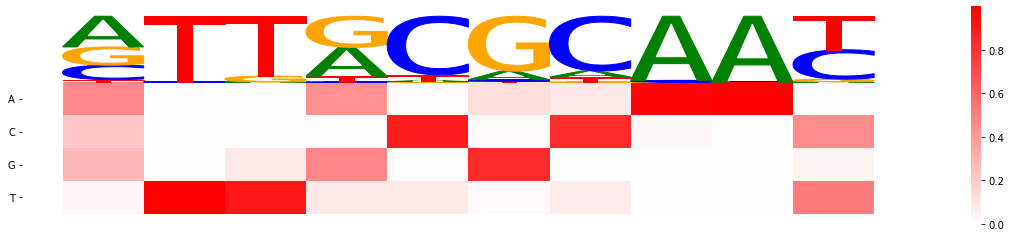

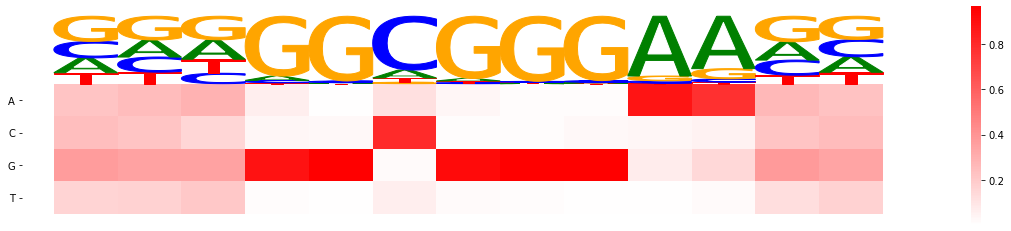

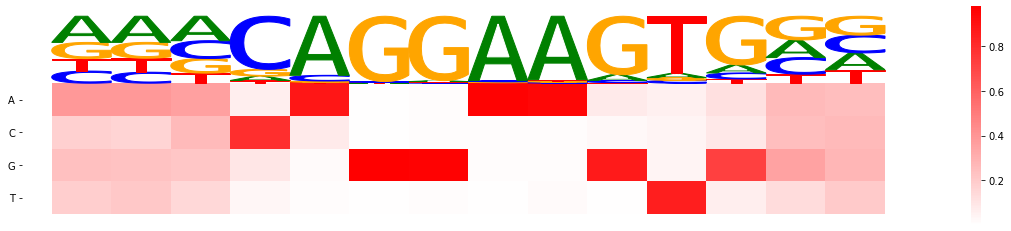

In [38]:
jaspar_id = ['MA0162.4', 'MA0466.2', 'MA0471.2', 'MA0473.3']
index = 0
jaspar = getJasparPwm(index)
seqlogo_heatmap(jaspar, jaspar.T)
index = 1
jaspar = getJasparPwm(index)
seqlogo_heatmap(jaspar, jaspar.T)
index = 2
jaspar = getJasparPwm(index)
seqlogo_heatmap(jaspar, jaspar.T)
index = 3
jaspar = getJasparPwm(index)
seqlogo_heatmap(jaspar, jaspar.T)

<AxesSubplot:>

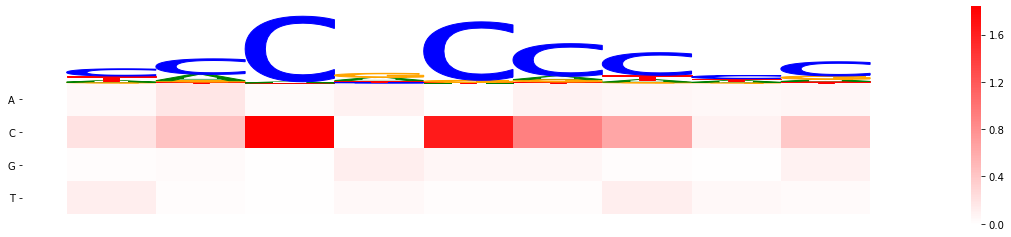

In [39]:
seqlogo_heatmap(pwmRevComp(np.array(pwms[97])), 
                pwmRevComp(np.array(pwms[97]).T))

<AxesSubplot:>

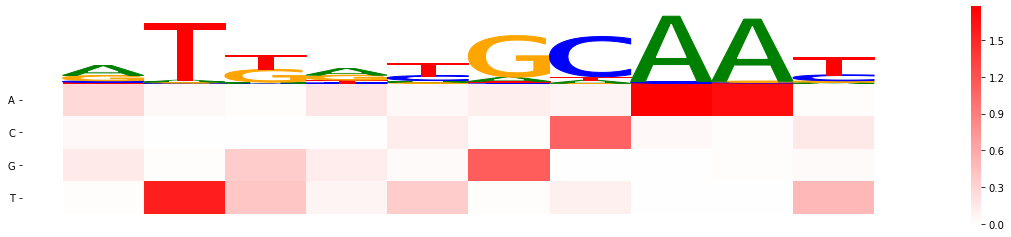

In [41]:
seqlogo_heatmap(pwmRevComp(np.array(pwms[11])), 
                pwmRevComp(np.array(pwms[11]).T))

<AxesSubplot:>

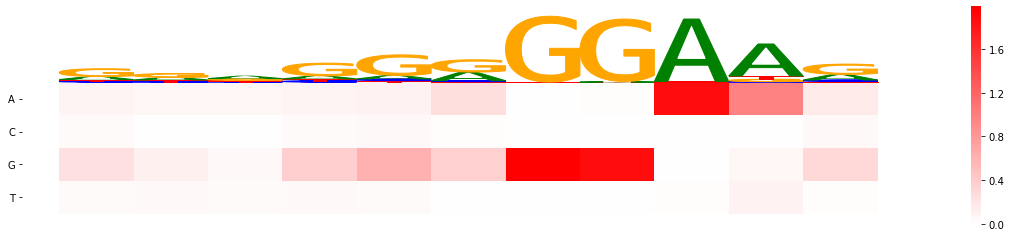

In [43]:
seqlogo_heatmap(np.array(pwms[100]), 
                np.array(pwms[100]).T)

In [67]:
file_name = 'pwms.txt'
file = open(file_name, 'a')
for i in range(len(pwms)):
    test = np.array(pwms[i])
    for i in range(4):
        test[:, i] = test[:, i] / test.sum(1)
    np.savetxt(file, test)
    file.write("\n")
file.close()

In [63]:
test = np.array(pwms[100])
test

array([[0.09141413, 0.03482443, 0.23506491, 0.04353054],
       [0.07774021, 0.01388218, 0.11383388, 0.05275228],
       [0.07376518, 0.01552951, 0.05629448, 0.0349414 ],
       [0.09256287, 0.043196  , 0.38259318, 0.05553772],
       [0.10629956, 0.05314978, 0.62008074, 0.04429148],
       [0.26154269, 0.0290603 , 0.37051881, 0.01453015],
       [0.        , 0.        , 1.99106114, 0.        ],
       [0.02050213, 0.        , 1.88619582, 0.        ],
       [1.88619582, 0.        , 0.        , 0.02050213],
       [0.96670655, 0.01239367, 0.07436204, 0.09914939],
       [0.16980364, 0.04684238, 0.3103308 , 0.01756589]])

In [65]:
 test.sum(0)

array([3.76344086, 0.37013973, 5.01038212, 0.47007515])

<AxesSubplot:>

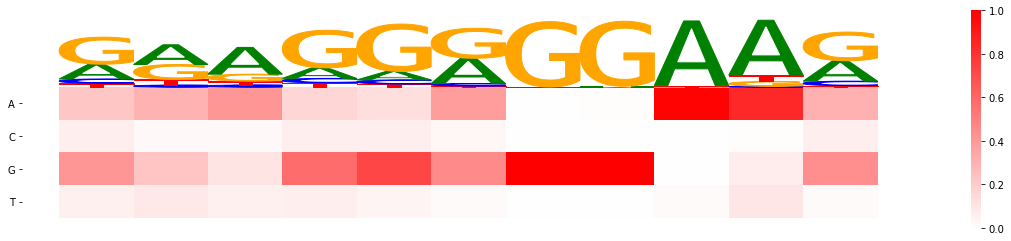

In [66]:
seqlogo_heatmap(test, test.T)